In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## The revised method

In [24]:
def get_lamda(x):
    l = 0
    x = x/60
    if (0 <= x and x < 6):
        l = 0.2
    elif (6 <= x and x < 8):
        l = 0.9
    elif (8 <= x and x < 12):
        l = 0.5
    elif (12 <= x and x < 15):
        l = 0.6 
    elif (15 <= x and x < 17):
        l = 1.0
    elif (17 <= x and x < 19):
        l = 0.6    
    else :
        l = 0.5
    return l    

In [25]:
# The revised algorithm

def revised(T = 24):
    # convert T to minutes.
    T = T*60
    U_lamda = 1 
    x_0 = 0
    m = np.random.poisson(U_lamda*T)
    x = [x_0]
    x_accept = []
    for i in range(1, m + 1):
        u = random.random()
        x_i = x[i -1] + (T - x[i -1])*(1 - (u)**(1/(m-i+1)))
        y = random.uniform(0, U_lamda)
        l = get_lamda(x_i)
        x.append(x_i)
        if y <= l:
            x_accept.append(x_i)
    return x_accept        

In [26]:
# 1000 simulations of the revised algorithm.

def simulate_revised(sim = 1000):
    # return a list of all simulations. So, a list of lists. 
    X = []
    for _ in range(sim):
        X.append(revised())
    return X    

In [27]:
# Get the the list of all simulations
X = simulate_revised()

In [28]:
def get_number_cars(x : list):
    # Compute the number of cars arrived at each minute from one simulation.
    cars_arrived = [0 for _ in range(1440)]
    for k in range(len(x)):
        i = math.ceil(x[k])
        cars_arrived[i - 1] += 1
    return cars_arrived

In [29]:
# The number of cars arrived per minute over 1000 simulations
def cars_arrived_1000(X):
    cars_arrived_1000 = []
    for i in range(1000):
        cars_arrived_1000.append(get_number_cars(X[i]))
    return cars_arrived_1000    

In [30]:
Cars_arrived_1000 = cars_arrived_1000(X)

In [31]:
def average_cars_per_minute(Cars_arrived_1000):
    avg = []
    for k in range(1440):
        a = 0
        for j in range(1000):
            a += Cars_arrived_1000[j][k]
        avg.append(a/1000)
    return avg    

In [32]:
# Get the averages of cars arrived per minute over 1000 simulation
average_cars_1000 = average_cars_per_minute(Cars_arrived_1000)

Text(0.5, 1.0, 'Revised algorithm : Average cars arrived per minute')

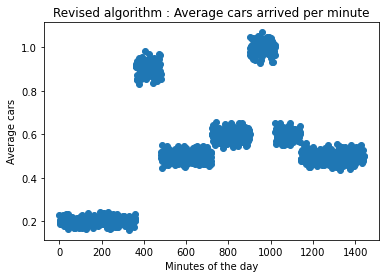

In [34]:
# Plot the averages.
minutes = [(i + 1) for i in range(1440)]
plt.scatter(minutes, average_cars_1000)
plt.xlabel("Minutes of the day")
plt.ylabel("Average cars")
plt.title("Revised algorithm : Average cars arrived per minute")

In [35]:
# Function to cummulate the numbers in a list.
def cummulate(L : list):
    cumm = []
    size = len(L)
    cumm = [sum(L[0:x:1]) for x in range(0, size+1)]
    return cumm[1:]

In [36]:
# Get the list of cummulative cars arrived per minute in average
Cummulative_cars_arrived = cummulate(average_cars_1000)

Text(0.5, 1.0, 'Revised algorithm : Cummulative cars arrived per minute')

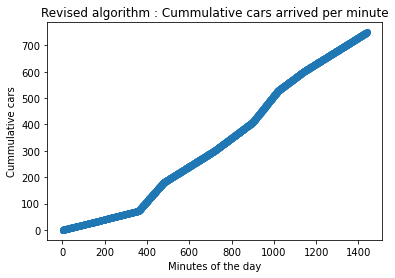

In [39]:
# Plot the averages.
minutes = [(i + 1) for i in range(1440)]
plt.scatter(minutes, Cummulative_cars_arrived)
plt.xlabel("Minutes of the day")
plt.ylabel("Cummulative cars")
plt.title("Revised algorithm : Cummulative cars arrived per minute")

In [40]:
# Printing numerical values

print("The revised simulations : \n")
average_cars_arrived_in_day = Cummulative_cars_arrived[-1]

average_time_first_car = 0
for i in range(1000):
    average_time_first_car += X[i][0]
average_time_first_car /= 1000

print(f"The average number of cars that arrived in one day is {average_cars_arrived_in_day} cars.")
print(f"The average time when the first car arrived {average_time_first_car} minutes after 00:00")

The revised simulations : 

The average number of cars that arrived in one day is 749.4810000000009 cars.
The average time when the first car arrived 4.911180766137993 minutes after 00:00


## The thinning approach

In [41]:
# Algorithm

def thining(T = 1440):
    U_lambda = 1
    t = [0]
    t_acc = []
    i = 1
    while(True):
        t_sample = np.random.exponential(U_lambda)
        new_t = t[i - 1] + t_sample
        t.append(new_t)
        if (new_t > T):
            break
        u = random.random()
        l = get_lamda(new_t)
        if (u <= l/U_lambda):
            t_acc.append(new_t)
        i += 1
    return t_acc    

In [42]:
# 1000 simulations of the thining algorithm

def simulate_thining(sim = 1000):
    Y = []
    for _ in range(sim):
        Y.append(thining())
    return Y    

In [43]:
# get the list of simulations
Y = simulate_thining()

In [44]:
# cars arrived per minute
Cars_arrived_1000_thining = cars_arrived_1000(Y) 

In [45]:
# Get the averages of cars arrived per minute over 1000 simulation
average_cars_1000_thining = average_cars_per_minute(Cars_arrived_1000_thining)

Text(0.5, 1.0, 'Thining algorithm : Average cars arrived per minute')

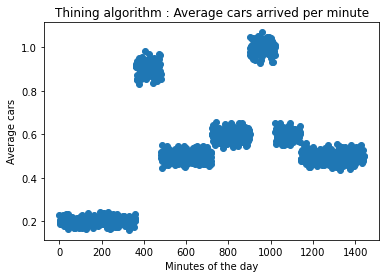

In [46]:
# Plot the averages.
minutes = [(i + 1) for i in range(1440)]
plt.scatter(minutes, average_cars_1000)
plt.xlabel("Minutes of the day")
plt.ylabel("Average cars")
plt.title("Thining algorithm : Average cars arrived per minute")

In [47]:
# Get the list of cummulative cars arrived per minute in average
Cummulative_cars_arrived_thining = cummulate(average_cars_1000_thining)

Text(0.5, 1.0, 'Thining algorithm: Cummulative cars arrived per minute')

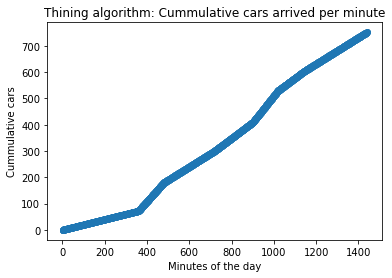

In [49]:
# Plot the averages.
minutes = [(i + 1) for i in range(1440)]
plt.scatter(minutes, Cummulative_cars_arrived_thining)
plt.xlabel("Minutes of the day")
plt.ylabel("Cummulative cars")
plt.title("Thining algorithm: Cummulative cars arrived per minute")

In [50]:
# Printing numerical values

print("The thining simulations : \n")
average_cars_arrived_in_day_thining = Cummulative_cars_arrived_thining[-1]

average_time_first_car_thining = 0
for i in range(1000):
    average_time_first_car_thining += Y[i][0]
average_time_first_car_thining /= 1000

print(f"The average number of cars that arrived in one day is {average_cars_arrived_in_day_thining} cars.")
print(f"The average time when the first car arrived {average_time_first_car_thining} minutes after 00:00")

The thining simulations : 

The average number of cars that arrived in one day is 751.0440000000011 cars.
The average time when the first car arrived 4.905725228133915 minutes after 00:00
